## Regional Tuberclouse Patterns and Patient Distribution Analysis

#### Summary
This project presents a comprehensive analysis of **Tuberculosis (TB) cases** recorded at a government hospital in **Kishtwar district, Jammu & Kashmir**, using real-world clinical data. The primary objective was to identify trends, high-risk groups, and systemic gaps in diagnosis and treatment processes. Data for this analysis was sourced from the District Tuberculosis Unit (DTU) in Kishtwar.

The insights in this report were derived through data analysis techniques, including feature extraction, exploratory data analysis, data visualization, multivariate analysis, and statistical tests like the Chi-square. 

Key takeaways:

- **82.2%** of patients were diagnosed through **public healthcare**, highlighting its dominant role.

- **54.9%** of cases occurred in the **18–45 age group**, with a notable **male predominance**.

- **Missing or inconsistent data** (e.g., treatment start dates, diagnosis methods) was observed in multiple fields, indicating a need for better record-keeping infrastructure.

- Patients came from various parts of Jammu, Doda, and Kashmir, but most were concentrated in Kishtwar.

#### Scope of the report
While the dataset was small with only 366 entries and 16 features, which may introduce some bias, the findings offer valuable insights that may be helpful for future district research and healthcare planning efforts. The report focuses solely on the data provided by DTU Kishtwar, which includes information from the TU's DTC Kishtwar, Ramban, and Paddar. Additionally, the shared data lacked several important factors that significantly impact TB, such as patients' smoking or alcohol use, family history, and other relevant aspects.

**Column Descriptions**

- **State**: The state where the patient is registered (all entries are from J&K).
- **TU**: Treatment Unit managing the case (e.g., Kishtwar, Paddar, Ramban).
- **Diagnosed from which Facility**: Name/location of the diagnosing facility.
- **Public/Private**: Indicates if the diagnosing facility is public or private.
- **Address**: Patient's residential address (used for geographic mapping).
- **Diagnosis Date**: Date the patient was diagnosed with TB.
- **Age**: Patient’s age (may contain mixed formats).
- **Gender**: Gender of the patient (Male/Female/Other).
- **Type**: TB case type (New, Trunat (MTB), etc.).
- **Site**: TB infection site (Pulmonary, Extrapulmonary, etc.).
- **HIV Status**: Patient’s HIV test result (Reactive, Non-reactive, etc.).
- **TB Drug Regimen**: The treatment regimen prescribed.
- **Tretment Start Date**: When treatment began.
- **Weight**: Patient’s weight.
- **Diabetic Status**: Indicates if the patient is diabetic or not.
- **EP Site**: Specific site of extrapulmonary TB, if applicable.
- **nan**: Unnamed column, likely redundant and may be dropped.

In [1]:
# Importind the libraries 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data loading 

In [3]:
data = pd.read_excel('tb.xlsx')

In [4]:
data

,Unnamed: 0,TU,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Spectrum_Current_State,Spectrum_Current_TBU,Spectrum_Diagnosing_District,Spectrum_Modified_Diagnosing_facility_type,Address,Spectrum_Diagnosis_Date,Age,Gender,Type_of_Case,Site_of_TBDisease,Status_of_HIV,Type_of_TB_regimen,Treatment_Initiation_Date,Weight,Status_of_Diabetes,EPSite,NaN
1,State,TU,Diagnosed from which Facility,Public/Private,Address,Diagnosis Date,Age,Gender,Type,Site,HIV Status,TB Drug Regimen,Tretment Start Date,Weight,Diabetic Status,EP Site,NaN
2,Jammu & Kashmir,DTC Kishtwar,Jammu,Public,Kishtwar,2024-07-11 00:00:00,70,Male,New,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
3,Jammu & Kashmir,DTC Kishtwar,Doda,Public,PIYAS KISHTWAR,2024-08-06 00:00:00,24,Male,New,Pulmonary,Non-Reactive,2HRZE/4HRE,2024-08-06 00:00:00,52,Non-diabetic,NaN,NaN
4,Jammu & Kashmir,DTC Kishtwar,Doda,Public,SHAKTI NAGAR KISHTWAR,2024-08-03 00:00:00,60,Female,New,Extra Pulmonary,Non-Reactive,2HRZE/4HRE,2024-08-03 00:00:00,58,NaN,Lymph Node,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,Jammu & Kashmir,DTC Kishtwar,Doda,Public,PATH GAM MARWAH KISHTWAR,2024-04-04 00:00:00,35,Female,CBNAAT,New,Pulmonary,NaN,NaN,160,49,2024-09-19 00:00:00,1.0
911,Jammu & Kashmir,PADDER,Doda,Public,LAGRI PADDER,2024-03-29 00:00:00,40,Male,Microscopy ZN and Fluorescent,New,Pulmonary,NaN,NaN,160,47,2024-09-13 00:00:00,1.0
912,Jammu & Kashmir,Doda,Doda,Public,Panthan ward no 7,2024-04-04 00:00:00,15,Female,Trunat (MTB),New,Pulmonary,NaN,CURED,102,33,2024-09-20 00:00:00,1.0
913,Jammu & Kashmir,DTC Kishtwar,Doda,Public,DOOL KISHTWAR,2024-04-03 00:00:00,19,Female,Microscopy ZN and Fluorescent,New,Pulmonary,NaN,NaN,160,47,2024-09-18 00:00:00,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   915 non-null    object 
 1   TU           915 non-null    object 
 2   Unnamed: 2   915 non-null    object 
 3   Unnamed: 3   915 non-null    object 
 4   Unnamed: 4   915 non-null    object 
 5   Unnamed: 5   915 non-null    object 
 6   Unnamed: 6   915 non-null    object 
 7   Unnamed: 7   915 non-null    object 
 8   Unnamed: 8   911 non-null    object 
 9   Unnamed: 9   830 non-null    object 
 10  Unnamed: 10  878 non-null    object 
 11  Unnamed: 11  46 non-null     object 
 12  Unnamed: 12  458 non-null    object 
 13  Unnamed: 13  880 non-null    object 
 14  Unnamed: 14  880 non-null    object 
 15  Unnamed: 15  890 non-null    object 
 16  Unnamed: 16  868 non-null    float64
dtypes: float64(1), object(16)
memory usage: 121.7+ KB


In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

Unnamed: 0       0
TU               0
Unnamed: 2       0
Unnamed: 3       0
Unnamed: 4       0
Unnamed: 5       0
Unnamed: 6       0
Unnamed: 7       0
Unnamed: 8       4
Unnamed: 9      85
Unnamed: 10     37
Unnamed: 11    869
Unnamed: 12    457
Unnamed: 13     35
Unnamed: 14     35
Unnamed: 15     25
Unnamed: 16     47
dtype: int64

##### Initial Observations:
- Column names are inconsistent and should be renamed for clarity.

- The dataset contains a significant number of null (missing) values.

- No duplicate records were found.

## 1. Data Cleaning

In [8]:
data.head()

,Unnamed: 0,TU,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Spectrum_Current_State,Spectrum_Current_TBU,Spectrum_Diagnosing_District,Spectrum_Modified_Diagnosing_facility_type,Address,Spectrum_Diagnosis_Date,Age,Gender,Type_of_Case,Site_of_TBDisease,Status_of_HIV,Type_of_TB_regimen,Treatment_Initiation_Date,Weight,Status_of_Diabetes,EPSite,NaN
1,State,TU,Diagnosed from which Facility,Public/Private,Address,Diagnosis Date,Age,Gender,Type,Site,HIV Status,TB Drug Regimen,Tretment Start Date,Weight,Diabetic Status,EP Site,NaN
2,Jammu & Kashmir,DTC Kishtwar,Jammu,Public,Kishtwar,2024-07-11 00:00:00,70,Male,New,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
3,Jammu & Kashmir,DTC Kishtwar,Doda,Public,PIYAS KISHTWAR,2024-08-06 00:00:00,24,Male,New,Pulmonary,Non-Reactive,2HRZE/4HRE,2024-08-06 00:00:00,52,Non-diabetic,NaN,NaN
4,Jammu & Kashmir,DTC Kishtwar,Doda,Public,SHAKTI NAGAR KISHTWAR,2024-08-03 00:00:00,60,Female,New,Extra Pulmonary,Non-Reactive,2HRZE/4HRE,2024-08-03 00:00:00,58,NaN,Lymph Node,NaN


In [9]:
data.iloc[1]

Unnamed: 0                             State
TU                                        TU
Unnamed: 2     Diagnosed from which Facility
Unnamed: 3                    Public/Private
Unnamed: 4                           Address
Unnamed: 5                    Diagnosis Date
Unnamed: 6                               Age
Unnamed: 7                            Gender
Unnamed: 8                              Type
Unnamed: 9                              Site
Unnamed: 10                       HIV Status
Unnamed: 11                  TB Drug Regimen
Unnamed: 12              Tretment Start Date
Unnamed: 13                           Weight
Unnamed: 14                  Diabetic Status
Unnamed: 15                          EP Site
Unnamed: 16                              NaN
Name: 1, dtype: object

In [10]:
data.iloc[2]

Unnamed: 0         Jammu & Kashmir
TU                    DTC Kishtwar
Unnamed: 2                   Jammu
Unnamed: 3                  Public
Unnamed: 4                Kishtwar
Unnamed: 5     2024-07-11 00:00:00
Unnamed: 6                      70
Unnamed: 7                    Male
Unnamed: 8                     New
Unnamed: 9                     NaN
Unnamed: 10                Unknown
Unnamed: 11                    NaN
Unnamed: 12                    NaN
Unnamed: 13                    NaN
Unnamed: 14                    NaN
Unnamed: 15                    NaN
Unnamed: 16                    NaN
Name: 2, dtype: object

##### 1.1 Removing Duplicate Header Rows

> The first two rows contain redundant header-like content and will be removed.  
> The actual column headers are set using the second row.

In [11]:
data.columns = data.iloc[1]

In [12]:
data = data.iloc[2:]

In [13]:
data.reset_index(drop = True, inplace = True)

In [14]:
data

1,State,TU,Diagnosed from which Facility,Public/Private,Address,Diagnosis Date,Age,Gender,Type,Site,HIV Status,TB Drug Regimen,Tretment Start Date,Weight,Diabetic Status,EP Site,NaN
0,Jammu & Kashmir,DTC Kishtwar,Jammu,Public,Kishtwar,2024-07-11 00:00:00,70,Male,New,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
1,Jammu & Kashmir,DTC Kishtwar,Doda,Public,PIYAS KISHTWAR,2024-08-06 00:00:00,24,Male,New,Pulmonary,Non-Reactive,2HRZE/4HRE,2024-08-06 00:00:00,52,Non-diabetic,NaN,NaN
2,Jammu & Kashmir,DTC Kishtwar,Doda,Public,SHAKTI NAGAR KISHTWAR,2024-08-03 00:00:00,60,Female,New,Extra Pulmonary,Non-Reactive,2HRZE/4HRE,2024-08-03 00:00:00,58,NaN,Lymph Node,NaN
3,Jammu & Kashmir,DTC Kishtwar,Doda,PRIVATE,WARDA KISHTWAR,2024-07-10 00:00:00,19,Female,NaN,Pulmonary,Non-Reactive,2HRZE/4HRE,2024-07-10 00:00:00,38,Non-diabetic,NaN,NaN
4,Jammu & Kashmir,DTC Kishtwar,Doda,Public,PADYARNA KISHTWAR,2024-07-31 00:00:00,18,Female,New,Pulmonary,Non-Reactive,2HRZE/4HRE,2024-07-31 00:00:00,32,Non-diabetic,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,Jammu & Kashmir,DTC Kishtwar,Doda,Public,PATH GAM MARWAH KISHTWAR,2024-04-04 00:00:00,35,Female,CBNAAT,New,Pulmonary,NaN,NaN,160,49,2024-09-19 00:00:00,1.0
909,Jammu & Kashmir,PADDER,Doda,Public,LAGRI PADDER,2024-03-29 00:00:00,40,Male,Microscopy ZN and Fluorescent,New,Pulmonary,NaN,NaN,160,47,2024-09-13 00:00:00,1.0
910,Jammu & Kashmir,Doda,Doda,Public,Panthan ward no 7,2024-04-04 00:00:00,15,Female,Trunat (MTB),New,Pulmonary,NaN,CURED,102,33,2024-09-20 00:00:00,1.0
911,Jammu & Kashmir,DTC Kishtwar,Doda,Public,DOOL KISHTWAR,2024-04-03 00:00:00,19,Female,Microscopy ZN and Fluorescent,New,Pulmonary,NaN,NaN,160,47,2024-09-18 00:00:00,1.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          913 non-null    object 
 1   TU                             913 non-null    object 
 2   Diagnosed from which Facility  913 non-null    object 
 3   Public/Private                 913 non-null    object 
 4   Address                        913 non-null    object 
 5   Diagnosis Date                 913 non-null    object 
 6   Age                            913 non-null    object 
 7   Gender                         913 non-null    object 
 8   Type                           909 non-null    object 
 9   Site                           828 non-null    object 
 10  HIV Status                     876 non-null    object 
 11  TB Drug Regimen                44 non-null     object 
 12  Tretment Start Date            456 non-null    obj

In [16]:
data['TU'].unique()

array(['DTC Kishtwar', 'PADDER', 'UKHERAL', 'Doda', 'BHADERWAH', 'Ramban',
       'GOOL', 'GANDOH', 'THATHRI', 'CHATROO', 'BATOTE', 'ASSAR'],
      dtype=object)

##### 1.2 Regional focus
> While the dataset includes information from various units across the state, this analysis will focus specifically on the Kishtwar, Padar,and Ramban regions.

In [17]:
data = data[data['TU'].isin(['DTC Kishtwar', 'PADDER','Ramban'])]

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 911
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          366 non-null    object 
 1   TU                             366 non-null    object 
 2   Diagnosed from which Facility  366 non-null    object 
 3   Public/Private                 366 non-null    object 
 4   Address                        366 non-null    object 
 5   Diagnosis Date                 366 non-null    object 
 6   Age                            366 non-null    object 
 7   Gender                         366 non-null    object 
 8   Type                           362 non-null    object 
 9   Site                           331 non-null    object 
 10  HIV Status                     349 non-null    object 
 11  TB Drug Regimen                44 non-null     object 
 12  Tretment Start Date            163 non-null    object 


In [19]:
data.shape

(366, 17)

In [20]:
# Renaming the nan columns as it is not accessible otherwise 

In [21]:
data.rename(columns={data.columns[-1]: 'col_x'}, inplace=True)

C:\Users\jozyf\AppData\Local\Temp\ipykernel_19652\1089802500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={data.columns[-1]: 'col_x'}, inplace=True)


##### 1.3 Handling missing values of categorical column. 

In [22]:
data.isna().sum()

1
State                              0
TU                                 0
Diagnosed from which Facility      0
Public/Private                     0
Address                            0
Diagnosis Date                     0
Age                                0
Gender                             0
Type                               4
Site                              35
HIV Status                        17
TB Drug Regimen                  322
Tretment Start Date              203
Weight                            18
Diabetic Status                   18
EP Site                           25
col_x                             45
dtype: int64

In [23]:
data = data[data['Type'].notna()]

In [24]:
100* data['HIV Status'].isna().sum()/len(data)

4.696132596685083

##### 1.4 Missing value imputation 
> The HIV Status column has a relatively low percentage of missing values (4.69% of the total data). Therefore, it is reasonable to impute these missing entries with a placeholder value such as "Missing data" for consistency.

In [25]:
data['HIV Status'] = data['HIV Status'].fillna('missing data')

In [26]:
data['TB Drug Regimen'].value_counts()

TB Drug Regimen
2HRZE/4HRE    40
Name: count, dtype: int64

In [27]:
data['State'].value_counts()

State
Jammu & Kashmir    362
Name: count, dtype: int64

In [28]:
# dropping state column as it has no significant information 
data.drop(columns = 'State', inplace = True)

#### 1.5 Data conversion to lower case
> To ensure consistency and avoid duplication due to case sensitivity, converting all data to lowercase.

In [29]:
data.columns

Index(['TU', 'Diagnosed from which Facility', 'Public/Private', 'Address',
       'Diagnosis Date', 'Age', 'Gender', 'Type', 'Site', 'HIV Status',
       'TB Drug Regimen', 'Tretment Start Date', 'Weight', 'Diabetic Status',
       'EP Site', 'col_x'],
      dtype='object', name=1)

In [30]:
temp_col = ['TU', 'Diagnosed from which Facility', 'Public/Private', 'Address',
            'Gender', 'Type', 'Site', 'HIV Status']
for col in temp_col:
    data[col] = data[col].astype(str).str.lower()

In [31]:
for i in temp_col:
    print(data[i].value_counts())
    print('*'*50)

TU
dtc kishtwar    182
ramban          153
padder           27
Name: count, dtype: int64
**************************************************
Diagnosed from which Facility
doda          233
jammu          82
anantnag       20
srinagar       15
udhampur        5
chandigarh      4
baramulla       2
kathua          1
Name: count, dtype: int64
**************************************************
Public/Private
public     301
private     61
Name: count, dtype: int64
**************************************************
Address
kishtwar                                                        9
ramban                                                          8
dool kishtwar                                                   8
kanga                                                           5
ganote                                                          3
                                                               ..
ramban panchayat balhota                                        1
gwarian sigdi kis

#### 1.6 Converting the 'Diagnosis Date' to datetime data type.

In [32]:
data['Diagnosis Date'].unique()

array([datetime.datetime(2024, 7, 11, 0, 0),
       datetime.datetime(2024, 8, 6, 0, 0),
       datetime.datetime(2024, 8, 3, 0, 0),
       datetime.datetime(2024, 7, 31, 0, 0),
       datetime.datetime(2024, 7, 15, 0, 0),
       datetime.datetime(2024, 8, 28, 0, 0),
       datetime.datetime(2024, 7, 2, 0, 0),
       datetime.datetime(2024, 8, 19, 0, 0),
       datetime.datetime(2024, 8, 10, 0, 0),
       datetime.datetime(2024, 8, 27, 0, 0),
       datetime.datetime(2024, 8, 1, 0, 0),
       datetime.datetime(2024, 7, 12, 0, 0),
       datetime.datetime(2024, 7, 19, 0, 0),
       datetime.datetime(2024, 7, 8, 0, 0),
       datetime.datetime(2024, 7, 10, 0, 0),
       datetime.datetime(2024, 7, 16, 0, 0),
       datetime.datetime(2024, 7, 28, 0, 0),
       datetime.datetime(2024, 8, 5, 0, 0),
       datetime.datetime(2024, 8, 21, 0, 0),
       datetime.datetime(2024, 8, 24, 0, 0),
       datetime.datetime(2024, 7, 17, 0, 0),
       datetime.datetime(2024, 8, 7, 0, 0),
       datetime.d

In [33]:
data['Diagnosis Date'] = pd.to_datetime(data['Diagnosis Date'], errors='coerce')

In [34]:
data['Diagnosis Date']

0     2024-07-11
1     2024-08-06
2     2024-08-03
4     2024-07-31
5     2024-07-11
         ...    
906   2024-03-20
907   2024-03-29
908   2024-04-04
909   2024-03-29
911   2024-04-03
Name: Diagnosis Date, Length: 362, dtype: datetime64[ns]

In [35]:
data['Tretment Start Date'].unique()

array([nan, datetime.datetime(2024, 8, 6, 0, 0),
       datetime.datetime(2024, 8, 3, 0, 0),
       datetime.datetime(2024, 7, 31, 0, 0),
       datetime.datetime(2024, 7, 29, 0, 0),
       datetime.datetime(2024, 7, 15, 0, 0),
       datetime.datetime(2024, 8, 28, 0, 0),
       datetime.datetime(2024, 7, 2, 0, 0),
       datetime.datetime(2024, 8, 19, 0, 0),
       datetime.datetime(2024, 8, 10, 0, 0),
       datetime.datetime(2024, 8, 27, 0, 0),
       datetime.datetime(2024, 8, 1, 0, 0),
       datetime.datetime(2024, 7, 12, 0, 0),
       datetime.datetime(2024, 8, 7, 0, 0),
       datetime.datetime(2024, 7, 19, 0, 0),
       datetime.datetime(2024, 7, 8, 0, 0),
       datetime.datetime(2024, 7, 20, 0, 0),
       datetime.datetime(2024, 7, 10, 0, 0),
       datetime.datetime(2024, 7, 16, 0, 0),
       datetime.datetime(2024, 7, 11, 0, 0),
       datetime.datetime(2024, 8, 5, 0, 0),
       datetime.datetime(2024, 8, 21, 0, 0),
       datetime.datetime(2024, 8, 24, 0, 0),
       datet

#### 1.7 Feature Extraction from 'Treatment Start Date' 
> The 'Tretment Start Date' column contains mixed data types, both datetime entries and textual values, where the datetime values indicate the start of treatment. Thus creating a new column 'Treatment Status' where datetime will be replaced with label "started", while all other text values will be retained as-is.

In [36]:
def status(cell):
    outcome = ['TREATMENT_COMPLETE', 'CURED','DIED', 'NOT_EVALUATED', 'WRONGLY_DIAGNOSED', 'LOST_TO_FOLLOW_UP', 'UNTRACEABLE_INCORRECT_ADDRESS', 'TREATMENT_REGIMEN_CHANGED']
    if cell in outcome:
        return cell
    elif pd.isna(cell):
        return 'missing data'
    else:
        return 'started'

In [37]:
data['Tretment Status'] = data['Tretment Start Date'].apply(status)

#### 1.8 
> Replacing the values in the column that indicate patient discharge with 0, in order to retain only the datetime entries for further analysis.

In [38]:
data['Tretment Start Date'] = data['Tretment Start Date'].apply(lambda x: 0 if x in ['TREATMENT_COMPLETE', 'CURED',
       'DIED', 'NOT_EVALUATED', 'WRONGLY_DIAGNOSED', 'LOST_TO_FOLLOW_UP',
       'UNTRACEABLE_INCORRECT_ADDRESS', 'TREATMENT_REGIMEN_CHANGED'] else x)

In [39]:
data['Tretment Start Date'] = pd.to_datetime(data['Tretment Start Date'], errors = 'coerce')

In [40]:
data['Tretment Start Date']

0            NaT
1     2024-08-06
2     2024-08-03
4     2024-07-31
5     2024-07-29
         ...    
906   1970-01-01
907          NaT
908          NaT
909          NaT
911          NaT
Name: Tretment Start Date, Length: 362, dtype: datetime64[ns]

In [41]:
data['Tretment Status'].value_counts()

Tretment Status
missing data                     203
CURED                             54
TREATMENT_COMPLETE                43
started                           40
DIED                               6
NOT_EVALUATED                      6
WRONGLY_DIAGNOSED                  6
TREATMENT_REGIMEN_CHANGED          2
LOST_TO_FOLLOW_UP                  1
UNTRACEABLE_INCORRECT_ADDRESS      1
Name: count, dtype: int64

#### 1.9 Converting 'Weight' columns containing numeric values stored as strings, to integer data types.

In [42]:
data['Weight'].unique()

array([nan, 52, 58, 32, 43, 60, 42, 47, 53, 49, 61, 40, 35, 44, 21, 36,
       97, 50, 64, 48, 54, 66, 46, 39, 33, 63, 24, 5, 169, 165, 156, 170,
       178, 162, 160, 152, 153, 158, 90, 172, 159, 145, 155, 142, 157,
       182, 88, 130, 166, 175, 180, 163, 168, 136, 167, 151, 148, 164,
       179, 176, 181, 96, 89, 185, 188, 184, 187, 150, 108, 149, 120, 82,
       123, 138, 144, 98, 70, 122, 183], dtype=object)

In [43]:
data['Weight'] = data['Weight'].astype(float)

In [44]:
data['Weight'].isna().sum()

18

In [45]:
100 * data['Weight'].isna().sum()/len(data)

4.972375690607735

#### 1.10 
> Convertion of the 'Weight' column introduced some null values (4.97 % of the total data), so it is safe to replace it with mean of that column.

In [46]:
data['Weight'] = data['Weight'].fillna(round(data['Weight'].mean(),2))

In [47]:
data['Diabetic Status'].value_counts(dropna = False)

Diabetic Status
Non-diabetic    38
45              28
52              20
NaN             18
50              18
55              18
48              15
60              15
49              14
42              14
64              14
40              13
47              10
54               9
43               7
58               6
59               6
44               6
51               6
62               6
46               6
35               5
67               4
57               4
29               3
56               3
36               3
63               3
34               3
80               3
70               3
41               3
75               2
74               2
37               2
61               2
20               2
38               2
76               2
39               2
30               2
69               2
53               1
16               1
72               1
68               1
7                1
12               1
11               1
71               1
Diabetic         1
73             

In [48]:
data['EP Site'].value_counts(dropna = False)

EP Site
NaN                       23
Bone (Excluding Spine)     6
2024-10-08 00:00:00        6
2024-10-31 00:00:00        5
2024-08-19 00:00:00        5
                          ..
2024-08-01 00:00:00        1
2024-03-01 00:00:00        1
2024-06-15 00:00:00        1
2024-03-06 00:00:00        1
2024-09-24 00:00:00        1
Name: count, Length: 169, dtype: int64

In [49]:
data['EP Site'].unique()

array([nan, 'Lymph Node', 'Abdominal', 'Bone (Excluding Spine)',
       'Pleural', 'Spinal', datetime.datetime(2024, 6, 25, 0, 0),
       datetime.datetime(2024, 10, 31, 0, 0),
       datetime.datetime(2024, 6, 24, 0, 0),
       datetime.datetime(2024, 9, 30, 0, 0),
       datetime.datetime(2024, 6, 27, 0, 0),
       datetime.datetime(2024, 7, 31, 0, 0),
       datetime.datetime(2024, 6, 29, 0, 0),
       datetime.datetime(2024, 7, 6, 0, 0),
       datetime.datetime(2025, 1, 17, 0, 0),
       datetime.datetime(2024, 7, 9, 0, 0),
       datetime.datetime(2024, 5, 21, 0, 0),
       datetime.datetime(2024, 7, 17, 0, 0),
       datetime.datetime(2024, 3, 22, 0, 0),
       datetime.datetime(2024, 1, 25, 0, 0),
       datetime.datetime(2024, 8, 7, 0, 0),
       datetime.datetime(2024, 7, 15, 0, 0),
       datetime.datetime(2024, 9, 15, 0, 0),
       datetime.datetime(2024, 11, 1, 0, 0),
       datetime.datetime(2024, 7, 22, 0, 0),
       datetime.datetime(2024, 1, 19, 0, 0),
       datetime.

#### 1.11
> Dropping 'Diabetic Status' and 'EP Site' as they seem to have data entry error. 

In [50]:
data.drop(columns = ['Diabetic Status','EP Site'], inplace = True)

In [51]:
data['col_x'].value_counts(dropna = False)

col_x
1.0    321
NaN     41
Name: count, dtype: int64

In [52]:
data['col_x'].fillna(0, inplace = True)

In [53]:
data.isna().sum()

1
TU                                 0
Diagnosed from which Facility      0
Public/Private                     0
Address                            0
Diagnosis Date                     0
Age                                0
Gender                             0
Type                               0
Site                               0
HIV Status                         0
TB Drug Regimen                  322
Tretment Start Date              203
Weight                             0
col_x                              0
Tretment Status                    0
dtype: int64

In [55]:
data.describe()

1,Diagnosis Date,Tretment Start Date,Weight,col_x
count,362,159,362.000000,362.000000
mean,2024-04-13 21:56:41.104972288,1983-09-24 15:50:56.603773568,146.014309,0.886740
min,2023-12-05 00:00:00,1970-01-01 00:00:00,5.000000,0.000000
25%,2024-02-28 06:00:00,1970-01-01 00:00:00,152.000000,1.000000
50%,2024-04-08 00:00:00,1970-01-01 00:00:00,160.000000,1.000000
75%,2024-05-31 18:00:00,1997-04-02 00:00:00,165.000000,1.000000
max,2024-08-28 00:00:00,2024-08-28 00:00:00,188.000000,1.000000
std,NaN,NaN,39.937241,0.317349


**Note:** TB Drug Regimen, Tretment Start Date still have null values but will treat them after analyizing its relation with other columns.

## 2. Univariate analysis 

In [54]:
data.head()

1,TU,Diagnosed from which Facility,Public/Private,Address,Diagnosis Date,Age,Gender,Type,Site,HIV Status,TB Drug Regimen,Tretment Start Date,Weight,col_x,Tretment Status
0,dtc kishtwar,jammu,public,kishtwar,2024-07-11,70,male,new,nan,unknown,NaN,NaT,146.01,0.0,missing data
1,dtc kishtwar,doda,public,piyas kishtwar,2024-08-06,24,male,new,pulmonary,non-reactive,2HRZE/4HRE,2024-08-06,52.00,0.0,started
2,dtc kishtwar,doda,public,shakti nagar kishtwar,2024-08-03,60,female,new,extra pulmonary,non-reactive,2HRZE/4HRE,2024-08-03,58.00,0.0,started
4,dtc kishtwar,doda,public,padyarna kishtwar,2024-07-31,18,female,new,pulmonary,non-reactive,2HRZE/4HRE,2024-07-31,32.00,0.0,started
5,dtc kishtwar,chandigarh,public,vill- beramata p.o- kisthwar teh- distt- kisth...,2024-07-11,48,male,new,pulmonary,non-reactive,2HRZE/4HRE,2024-07-29,43.00,0.0,started


In [55]:
data.columns

Index(['TU', 'Diagnosed from which Facility', 'Public/Private', 'Address',
       'Diagnosis Date', 'Age', 'Gender', 'Type', 'Site', 'HIV Status',
       'TB Drug Regimen', 'Tretment Start Date', 'Weight', 'col_x',
       'Tretment Status'],
      dtype='object', name=1)

In [7]:
for i in data.columns():
    print(data[i].value_counts())
    print('*'*50)

NameError: name 'data' is not defined

#### 2.1 Data visualization 

> Plotting the address-wise distribution of **TB cases** to explore the spread across different regions.

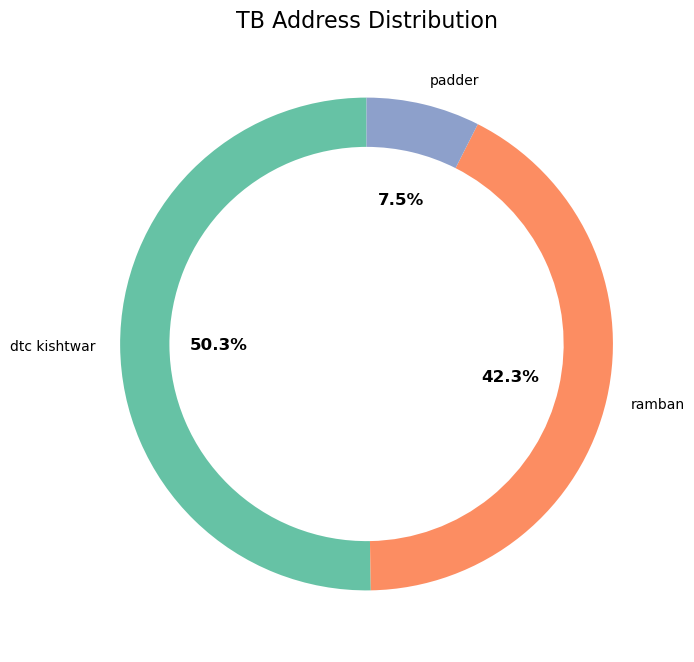

In [56]:
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(data['TU'].value_counts(), 
                                  labels=data['TU'].value_counts().index,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  colors=sns.color_palette('Set2'),
                                  wedgeprops=dict(width=0.2))

plt.setp(autotexts, size=12, weight="bold", color="black")
ax.set_title('TB Address Distribution', fontsize=16)
plt.show()

> Plotting individual bar charts for each categorical column to better understand the distribution of categories within the dataset.

In [57]:
plot_list1 = ['Diagnosed from which Facility', 'Public/Private', 'Gender',
             'Type', 'Site', 'HIV Status','Tretment Status']

In [58]:
len(plot_list1)

7

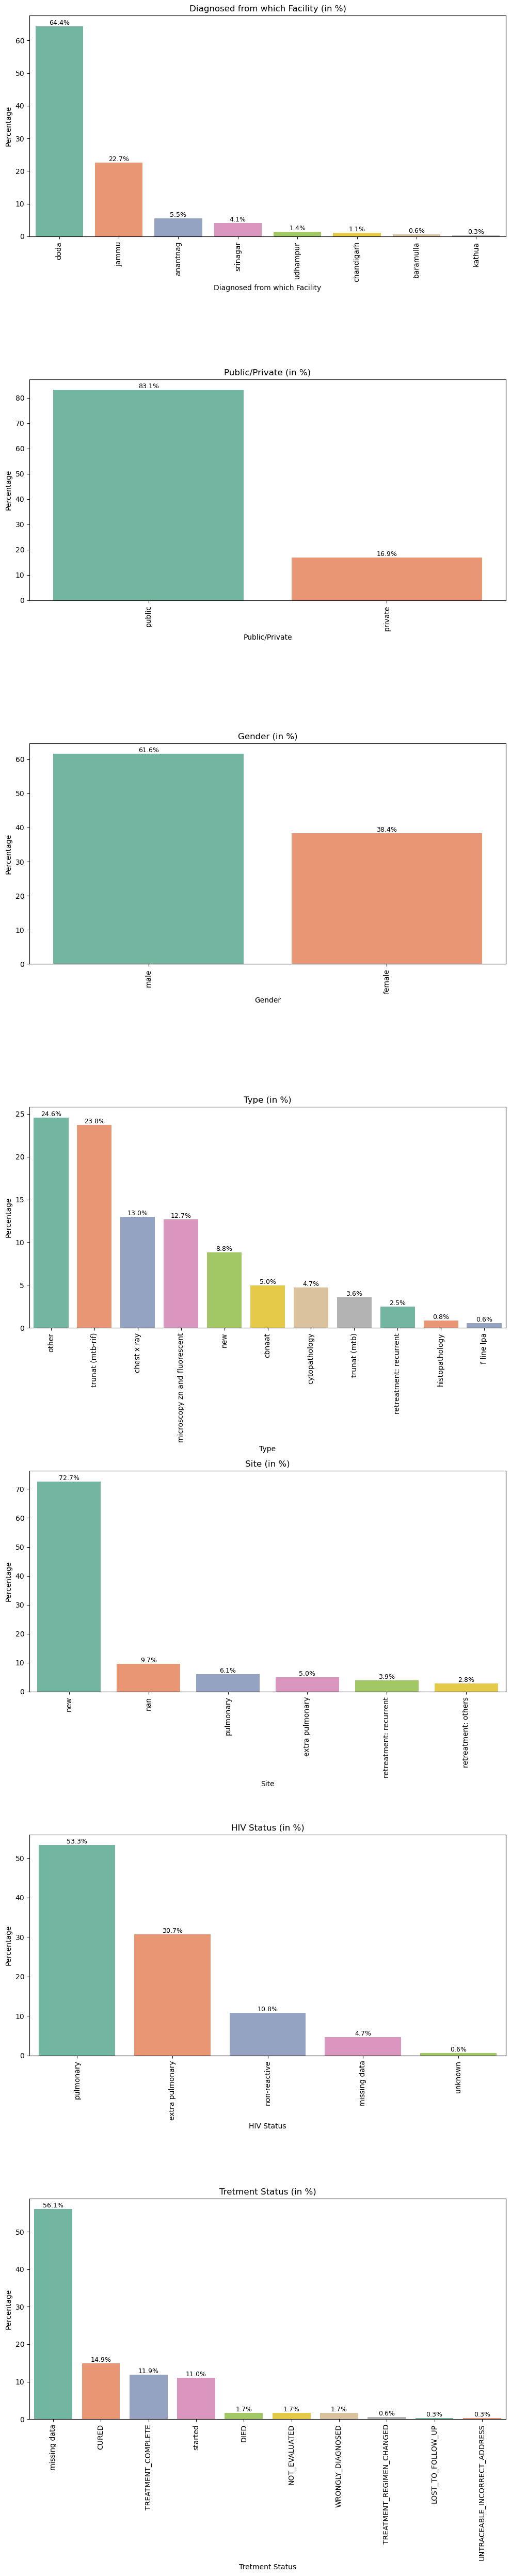

In [59]:
fig, axs = plt.subplots(7, 1, figsize=(10, 50))
axs = axs.flatten()

for i, col in enumerate(plot_list1):
    if i < 8:
        try:
            # Get value counts and percentage
            sub_df = data[col].value_counts(normalize=True).mul(100).reset_index()
            sub_df.columns = [col, 'percentage']
            # Plot percentage bars
            sns.barplot(x=col, y='percentage', data=sub_df, ax=axs[i], palette='Set2')
            
            axs[i].set_title(f'{col} (in %)')
            axs[i].set_ylabel('Percentage')
            axs[i].tick_params(axis='x', rotation=90)

            # Annotate bars
            for bar in axs[i].patches:
                height = bar.get_height()
                axs[i].annotate(f'{height:.1f}%', 
                                (bar.get_x() + bar.get_width() / 2, height),
                                ha='center', va='bottom', fontsize=9)

            # plt.savefig(f'{col}_percent_plot.png')

        except Exception as e:
            print(f"Can't plot {col}: {e}")

plt.tight_layout()

##### Key findings: 
- The majority of patients, approximately 50.3%, registered at the DTC unit in Kishtwar with a smaller yet significant, 42.3% from Ramban, while Paddar represents a smaller portion, with 7.5% of cases.
- A substantial 64.4% of patients across all three DTUs were diagnosed within the Doda District. Additional cases were recorded from nearby Jammu (22.7%) and Kashmir regions (10%), indicating a concentration of cases within Jammu and Kashmir.
- Majority of the population (83.1)% were diagonised through public healthcare facilities.
- Males showed a overall higher incidence. 

> Analyzing the remaining columns to uncover patterns in the data.

In [60]:
data.columns

Index(['TU', 'Diagnosed from which Facility', 'Public/Private', 'Address',
       'Diagnosis Date', 'Age', 'Gender', 'Type', 'Site', 'HIV Status',
       'TB Drug Regimen', 'Tretment Start Date', 'Weight', 'col_x',
       'Tretment Status'],
      dtype='object', name=1)

In [61]:
list(set(data.columns) - set(plot_list1))

['Address',
 'Tretment Start Date',
 'TB Drug Regimen',
 'col_x',
 'Age',
 'Diagnosis Date',
 'TU',
 'Weight']

In [62]:
plot_list2 = ['Tretment Start Date','TU','Age','Weight', 'Diagnosis Date','Address',
 'TB Drug Regimen', 'col_x']

In [63]:
data[plot_list2]

1,Tretment Start Date,TU,Age,Weight,Diagnosis Date,Address,TB Drug Regimen,col_x
0,NaT,dtc kishtwar,70,146.01,2024-07-11,kishtwar,NaN,0.0
1,2024-08-06,dtc kishtwar,24,52.00,2024-08-06,piyas kishtwar,2HRZE/4HRE,0.0
2,2024-08-03,dtc kishtwar,60,58.00,2024-08-03,shakti nagar kishtwar,2HRZE/4HRE,0.0
4,2024-07-31,dtc kishtwar,18,32.00,2024-07-31,padyarna kishtwar,2HRZE/4HRE,0.0
5,2024-07-29,dtc kishtwar,48,43.00,2024-07-11,vill- beramata p.o- kisthwar teh- distt- kisth...,2HRZE/4HRE,0.0
...,...,...,...,...,...,...,...,...
906,1970-01-01,ramban,39,169.00,2024-03-20,kundi,NaN,1.0
907,NaT,ramban,38,175.00,2024-03-29,ramban,NaN,1.0
908,NaT,dtc kishtwar,35,160.00,2024-04-04,path gam marwah kishtwar,NaN,1.0
909,NaT,padder,40,160.00,2024-03-29,lagri padder,NaN,1.0


#### 2.2
> Analyzing the **Address** column to understand the geographic patterns in the data.

In [64]:
data['Address'].unique()

array(['kishtwar', 'piyas kishtwar', 'shakti nagar kishtwar',
       'padyarna kishtwar',
       'vill- beramata p.o- kisthwar teh- distt- kisthwar j,k',
       'bhatkoot', 'tuj pangi killar hp',
       'kuntwara drab shalla near shiv mandir block kishtwar',
       'kuchhal kishtwar', 'palmar kishtwar', 'dool kishtwar',
       '77 sector 70 mohali ', 'bunjwah',
       'rehari colony near education board jammu', 'cherhar kishtwar',
       'dachhan kishtwar', 'kadini piyas kishtwar', 'semna kishtwar',
       'asrarabad kishtwar', 'inshan warwan', 'dashan kishtwar',
       'patti saroor kishtwar', 'singhpore chatroo', 'chatroo kishtwar',
       'symbol kishtwar', 'buddharb bunjwah kishtwar',
       'simbool mughal maidan kishtwar', '  village palmar klishtwar',
       'hurna', 'malan kishtwar', 'kuntwara kishtwar',
       'patimhaala kishtwar', 'bunastan kishtwar', 'mulchittar',
       'thakraie', 'paddar', 'jwalapur bonjwah', 'kishtwar dadpeth meen',
       'balhoti saroor kishtwar', 'kh

> There is repetition of the same areas in the dataset, listed under different names or varying prefixes, which requires standardization for accurate analysis.

In [65]:
hotspot_address = data['Address'].value_counts()[lambda x: x>=3]
hotspot_address 

Address
kishtwar            9
ramban              8
dool kishtwar       8
kanga               5
ganote              3
pernote             3
paddar              3
cherhar kishtwar    3
poochal             3
Name: count, dtype: int64

> This pie chart shows the distribution of patient addresses. We observe repetition of the same areas listed under different names or with varying prefixes.


<Axes: ylabel='count'>

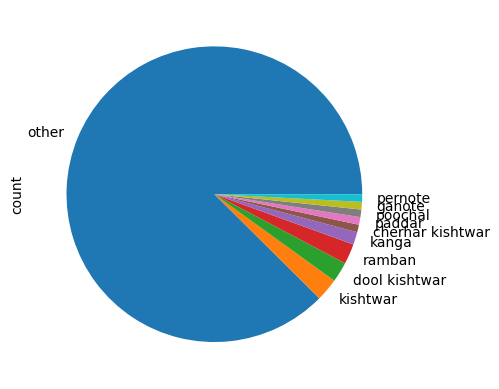

In [66]:
(data['Address'].apply(lambda x: x if x in hotspot_address else 'other').value_counts()).plot(kind = 'pie')

> To standardize address entries, mapping them to key locations based on keywords.

In [67]:
def address(cell):
    if 'kishtwar' in cell:
        return 'kishtwar'
    elif 'paddar' in cell or 'padder' in cell:
        return 'paddar'
    elif 'ramban' in cell:
        return 'ramban'
    elif pd.isna('cell'):
        return 'missing data'
    else:
      return 'other'

In [68]:
data[data['Address'].apply(address) == 'other']['Address'].unique()

array(['vill- beramata p.o- kisthwar teh- distt- kisthwar j,k',
       'bhatkoot', 'tuj pangi killar hp', '77 sector 70 mohali ',
       'bunjwah', 'rehari colony near education board jammu',
       'inshan warwan', 'singhpore chatroo', '  village palmar klishtwar',
       'hurna', 'mulchittar', 'thakraie', 'jwalapur bonjwah',
       'kharkoot nowgam', 'tanger', 'doda', 'singhpora',
       'ban talab tillo amar colony h.no 56', 'sher bibi. wagan',
       'main chowk banihal', 'poochal',
       'banihal vill banquoot near g.g.h school w', 'sumber',
       'seri ward no 1 near wasuk dev temple block bhadarwah', 'kanga',
       'purkhoo', 'maitra', 'hatta', 'kunate',
       'h.no 83 lane no 5d, upper shiv nagar', 'ganote',
       'banihall chamalvass', 'rajgard 1', 'rajgardh1', 'pernote', 'nera',
       'sigdhi bhalaana ', 'ward no 2 main bazar batyari block ram ban',
       'seri.   telimajra', 'balote', 'chandroge', 'tiyari',
       'h.no. 250 gujjar nagar', 'chanderkote', 'adwa', 'gand

> Visualizing the adress column after conversion.

In [69]:
data['Address'] = data['Address'].apply(address)

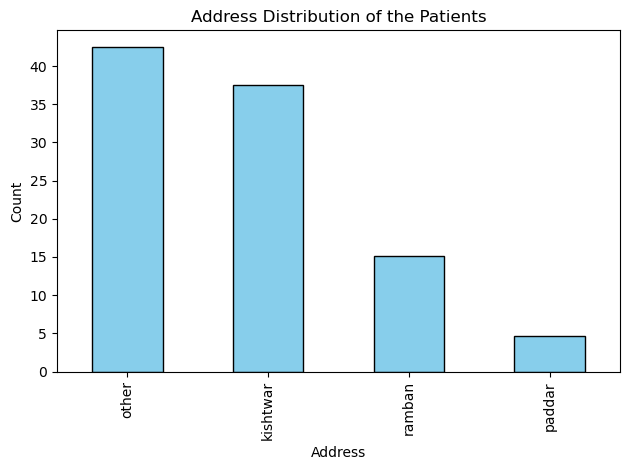

In [70]:
data['Address'].value_counts(normalize = True).mul(100).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Address Distribution of the Patients')
plt.xlabel('Address')
plt.ylabel('Count')
plt.tight_layout()

##### Key Findings: 

- Most TB patients are from smaller or unspecified localities grouped under "other,".
- Kishtwar is the most frequently identified specific address among the listed areas
- Few cases reported from Ramban and Paddar.

#### 2.3 
> Examining the Age column to understand the distribution,

In [71]:
data['Age']

0      70
1      24
2      60
4      18
5      48
       ..
906    39
907    38
908    35
909    40
911    19
Name: Age, Length: 362, dtype: object

> Creating 'age_group' column by converting the continuous Age column into **categorical bins**, to improve interpretability.

In [72]:
def age_groups(cell):
    if pd.isna(cell):
        return 'missing data'
    elif cell <13:
        return 'children'
    elif 13 <= cell < 18:
        return 'youth'
    elif 18 <= cell < 45:
        return 'Young Adults'
    elif 45 <= cell < 65:
        return ' Middle-Aged Adults'
    else:
        return 'senior citizens'

In [73]:
data['age_group'] = data['Age'].apply(age_groups)

> Plotting a pie chart of 'age_group' column to examine the distribution of the age. 

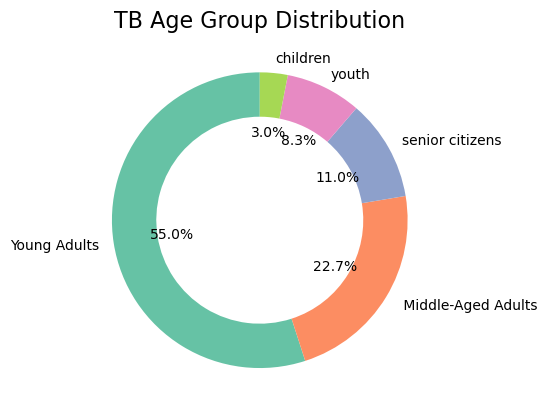

In [74]:
plt.pie(data['age_group'].value_counts(), 
        labels=data['age_group'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('Set2'),
        wedgeprops=dict(width=0.3))

plt.title('TB Age Group Distribution', fontsize=16)


plt.show()

#### Key findings: 
- Young Adults (18-45 years) form the largest group of TB cases at 55%.
- Middle-Aged Adults (45-65 years) account for 22.7% of cases, followed by senior citizens, youth and children.

In [75]:
data['Tretment Start Date'].value_counts(dropna = False)

Tretment Start Date
NaT           203
1970-01-01    119
2024-08-03      3
2024-08-28      3
2024-07-31      3
2024-08-01      2
2024-08-05      2
2024-07-16      2
2024-07-10      2
2024-08-06      2
2024-07-12      2
2024-08-07      2
2024-07-02      2
2024-07-29      2
2024-08-27      1
2024-08-10      1
2024-08-19      1
2024-07-08      1
2024-07-20      1
2024-07-15      1
2024-07-11      1
2024-08-21      1
2024-08-24      1
2024-07-18      1
2024-07-22      1
2024-07-06      1
2024-07-19      1
Name: count, dtype: int64

In [76]:
data['Diagnosis Date'].value_counts(dropna = False)

Diagnosis Date
2024-03-01    8
2024-02-02    6
2024-06-12    6
2024-06-24    6
2024-05-07    5
             ..
2024-03-26    1
2024-04-07    1
2024-03-08    1
2024-02-21    1
2024-03-20    1
Name: count, Length: 161, dtype: int64

In [77]:
data['Weight'].value_counts()

Weight
160.00    62
165.00    56
156.00    25
146.01    18
169.00    17
          ..
145.00     1
142.00     1
182.00     1
130.00     1
183.00     1
Name: count, Length: 79, dtype: int64

In [78]:
data['Weight'].unique()

array([146.01,  52.  ,  58.  ,  32.  ,  43.  ,  60.  ,  42.  ,  47.  ,
        53.  ,  49.  ,  61.  ,  40.  ,  35.  ,  44.  ,  21.  ,  36.  ,
        97.  ,  50.  ,  64.  ,  48.  ,  54.  ,  66.  ,  46.  ,  39.  ,
        33.  ,  63.  ,  24.  ,   5.  , 169.  , 165.  , 156.  , 170.  ,
       178.  , 162.  , 160.  , 152.  , 153.  , 158.  ,  90.  , 172.  ,
       159.  , 145.  , 155.  , 142.  , 157.  , 182.  ,  88.  , 130.  ,
       166.  , 175.  , 180.  , 163.  , 168.  , 136.  , 167.  , 151.  ,
       148.  , 164.  , 179.  , 176.  , 181.  ,  96.  ,  89.  , 185.  ,
       188.  , 184.  , 187.  , 150.  , 108.  , 149.  , 120.  ,  82.  ,
       123.  , 138.  , 144.  ,  98.  ,  70.  , 122.  , 183.  ])

#### Key findings
- Very less data on treatment start date and diagostic date which could introduce bias.
- The weight column contains several suspicious values. While many entries fall within a realistic human weight range (30–90 kg), others appear to be misentered 

#### Conclusion 1 based on univariate analysis

- The majority of patients, about 50.8%, are from the District Tuberculosis Unit (DTC) in Kishtwar, with a smaller but significant proportion (41.8%) from Ramban and 7.4% from Paddar TU.
- Patients admitted to all three TUs were mostly diagnosed in Doda District(64.8%), with a significant number from Jammu (22.4%) and nearby areas (2%). Some also came from Kashmir and surrounding regions (10%), but most were from Jammu and Kashmir.
- Approximately 82.2% were diagnosed through public healthcare centers.
- The majority of TB-infected patients are male(61.7%).
- Most cases used "other" and trunat (mtb-rif) methods, followed by chest x-ray and microscopy, using many other diagnostic methods.
- Approximately 10% of the patient's TB site information is missing, however around 71.9% are new cases, and 12% have either pulmonary or extra-pulmonary sites. There are also some retreatment cases(6.5%).
- The majority portion of TB patients have active pulmonary HIV(52.7%), and a significant proportion(30.3%) have extra-pulmonary. Only 11.7% of the TB patients have non-reactive HIV. Almost 5% of the patient's HIV status is not confirmed.
- A significant proportion of the diagnosed patients' treatment status is missing. However, many patients did start the treatment process, but few were not able to recieve any healthcare, due to reasons like already being cured, death, or other factors.
- Around 38.3% of the TB patients are from Kishtwar, 15% from Ramban, and 4.6% from Paddar. The rest of the population has either not given a valid address or lives somewhere else.
- Young Adults (18-45 years) form the largest group of TB cases at 54.9%, Middle-Aged Adults (45-65 years) account for 22.95% of cases, followed by senior citizens, youth and children. 

## 3. Bivariate analysis 

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362 entries, 0 to 911
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   TU                             362 non-null    object        
 1   Diagnosed from which Facility  362 non-null    object        
 2   Public/Private                 362 non-null    object        
 3   Address                        362 non-null    object        
 4   Diagnosis Date                 362 non-null    datetime64[ns]
 5   Age                            362 non-null    object        
 6   Gender                         362 non-null    object        
 7   Type                           362 non-null    object        
 8   Site                           362 non-null    object        
 9   HIV Status                     362 non-null    object        
 10  TB Drug Regimen                40 non-null     object        
 11  Tretment Start Date     

In [80]:
data.columns

Index(['TU', 'Diagnosed from which Facility', 'Public/Private', 'Address',
       'Diagnosis Date', 'Age', 'Gender', 'Type', 'Site', 'HIV Status',
       'TB Drug Regimen', 'Tretment Start Date', 'Weight', 'col_x',
       'Tretment Status', 'age_group'],
      dtype='object', name=1)

In [81]:
cat_col1 = ['Diagnosed from which Facility', 'Public/Private', 'Address',
       'Gender', 'Type', 'Site', 'HIV Status','col_x',
       'Tretment Status', 'age_group']

#### 3.1 Treatment Units (TUs) Vs other columns

> Analyzing the relationship between Treatment Units (TUs) and other categorical columns using cross-tabulation to identify patterns and associations in the data

In [82]:
for i in cat_col1:
    print(' ')
    print(f'This table shows the cross-tabulation between {i} and TU.')
    print(pd.crosstab(data[i], data['TU']))
    print(' ')
    print('*'*30)

 
This table shows the cross-tabulation between Diagnosed from which Facility and TU.
TU                             dtc kishtwar  padder  ramban
Diagnosed from which Facility                              
anantnag                                  2       0      18
baramulla                                 0       0       2
chandigarh                                2       1       1
doda                                    136       8      89
jammu                                    36      17      29
kathua                                    1       0       0
srinagar                                  5       1       9
udhampur                                  0       0       5
 
******************************
 
This table shows the cross-tabulation between Public/Private and TU.
TU              dtc kishtwar  padder  ramban
Public/Private                              
private                   40       6      15
public                   142      21     138
 
****************************

##### Observation

- DTC Kishtwar cases mostly diagnosed in Doda; Padder from Jammu; Ramban from Doda.

- Majority of cases in all TUs diagnosed via public healthcare.

- Males are more affected across all TUs.

- Multiple diagnostic methods are used.

- Young adults (18–35 years) are the most affected group.

#### 3.2 Diagonestic ceter Vs other columns
> Analyzing the relationship between the type of diagonestic center (Public/Private) and other categorical columns using cross-tabulation

In [83]:
cat_col2 = ['Address', 'Gender', 'Type', 'Site', 'HIV Status','col_x',
       'Tretment Status', 'age_group']

In [84]:
for i in cat_col2:
    print(' ')
    print(f'This table shows the cross-tabulation between {i} and from which facility did the patient got diagnosed from (Public/Private).')
    print(pd.crosstab(data[i], data['Public/Private']))
    print(' ')
    print('*'*30)

 
This table shows the cross-tabulation between Address and from which facility did the patient got diagnosed from (Public/Private).
Public/Private  private  public
Address                        
kishtwar             36     100
other                14     140
paddar                3      14
ramban                8      47
 
******************************
 
This table shows the cross-tabulation between Gender and from which facility did the patient got diagnosed from (Public/Private).
Public/Private  private  public
Gender                         
female               23     116
male                 38     185
 
******************************
 
This table shows the cross-tabulation between Type and from which facility did the patient got diagnosed from (Public/Private).
Public/Private                 private  public
Type                                          
cbnaat                               2      16
chest x ray                         14      33
cytopathology                  

##### Observations
- Most patients are diagnosed and treated in public facilities
- Males dominate in both sectors
- Majority of cases are new, with more retreatment in public
- Public sector shows better treatment recording and more cured cases.
- Young adults are the most affected in both sectors.

#### 3.3 Adress Vs other columns 
> Analyzing the relationship between the adress of the patient and other categorical columns using cross-tabulation

In [85]:
cat_col3 = ['Gender', 'Type', 'Site', 'HIV Status','col_x',
       'Tretment Status', 'age_group']

for i in cat_col2:
    print(' ')
    print(f'This table shows the cross-tabulation between {i} and the address of the patients.')
    print(pd.crosstab(data[i], data['Address']))
    print(' ')
    print('*'*30)

 
This table shows the cross-tabulation between Address and the address of the patients.
Address   kishtwar  other  paddar  ramban
Address                                  
kishtwar       136      0       0       0
other            0    154       0       0
paddar           0      0      17       0
ramban           0      0       0      55
 
******************************
 
This table shows the cross-tabulation between Gender and the address of the patients.
Address  kishtwar  other  paddar  ramban
Gender                                  
female         53     64       6      16
male           83     90      11      39
 
******************************
 
This table shows the cross-tabulation between Type and the address of the patients.
Address                        kishtwar  other  paddar  ramban
Type                                                          
cbnaat                                7      7       0       4
chest x ray                          16     25       1       5
cyt

##### Observations
- Patients mostly receive care in their own region (e.g., Kishtwar → Kishtwar, Ramban → Ramban).
- Males outnumber females across all addresses.
- Young adults are the most affected group, followed by middle-aged adults.

#### 3.4 Gender Vs other columns
> Analyzing the relationship between Gender of the patients and other categorical columns using cross-tabulation

In [86]:
cat_col4 = ['Type', 'Site', 'HIV Status','col_x',
       'Tretment Status', 'age_group']

for i in cat_col2:
    print(' ')
    print(f'This table shows the cross-tabulation between {i} and Gender of the patients.')
    print(pd.crosstab(data[i], data['Gender']))
    print(' ')
    print('*'*30)

 
This table shows the cross-tabulation between Address and Gender of the patients.
Gender    female  male
Address               
kishtwar      53    83
other         64    90
paddar         6    11
ramban        16    39
 
******************************
 
This table shows the cross-tabulation between Gender and Gender of the patients.
Gender  female  male
Gender              
female     139     0
male         0   223
 
******************************
 
This table shows the cross-tabulation between Type and Gender of the patients.
Gender                         female  male
Type                                       
cbnaat                             11     7
chest x ray                        16    31
cytopathology                      10     7
f line lpa                          1     1
histopathology                      2     1
microscopy zn and fluorescent      19    27
new                                14    18
other                              32    57
retreatment: recurrent  

##### Observation
- This table presents the cross-tabulation of patients' treatment status and age group. We observe that a significant amount of data appears to be missing.

#### 3.5
>Analyzing the relationship between Treatment Status and age_group using cross-tabulation

In [87]:
pd.crosstab(data['Tretment Status'], data['age_group'])

age_group,Middle-Aged Adults,Young Adults,children,senior citizens,youth
Tretment Status,,,,,
CURED,16,28,1,6,3
DIED,2,1,0,3,0
LOST_TO_FOLLOW_UP,0,1,0,0,0
NOT_EVALUATED,2,3,0,0,1
TREATMENT_COMPLETE,16,14,2,4,7
TREATMENT_REGIMEN_CHANGED,1,1,0,0,0
UNTRACEABLE_INCORRECT_ADDRESS,0,0,0,1,0
WRONGLY_DIAGNOSED,1,5,0,0,0
missing data,34,126,6,21,16


#### 3.6 Data visualization for bivariate analysis 
> Analyzing the tratment status of the patients across the age group using stacked bar plots. 

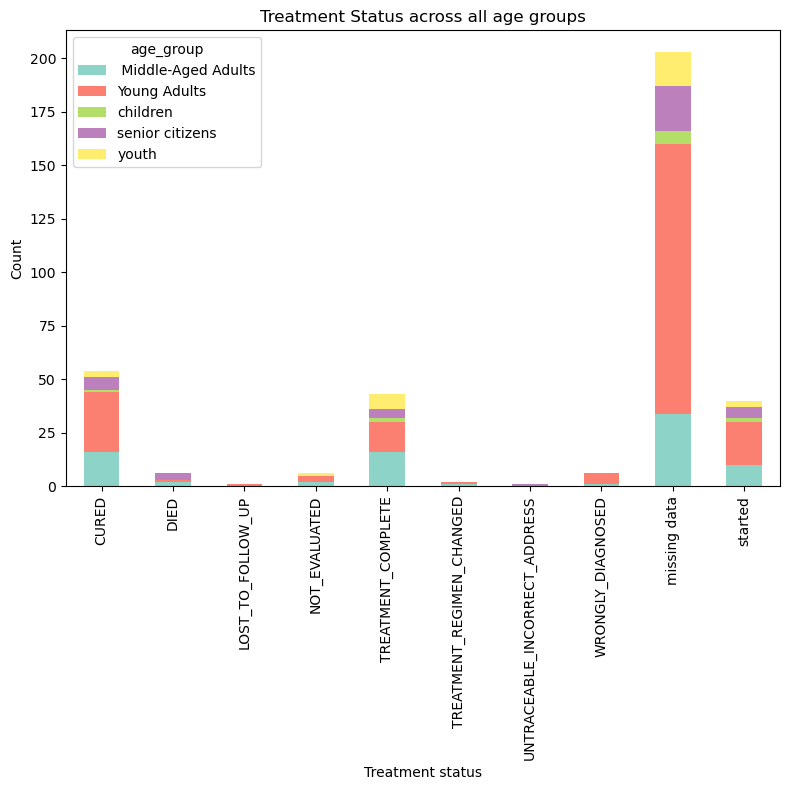

In [88]:
# contingency table for treatment status and age group
pivot_df = data.groupby(['Tretment Status', 'age_group']).size().unstack(fill_value=0)

# plotting the pivotal table 
pivot_df.plot(kind='bar', stacked=True, colormap='Set3', figsize = (8,8))

plt.title('Treatment Status across all age groups')  # Fixed typo in "Treatment"
plt.xlabel('Treatment status')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

##### Observations

- Most “CURED” and “TREATMENT_COMPLETE” cases are among Middle-Aged and Young Adults.
- Children have few cases but relatively good outcomes (few deaths, some completions).
- Senior Citizens show higher mortality and missing data rates.
- Missing data is notably high in Young Adults, suggesting gaps in documentation.

### 4. Multivariate analysis 

In [89]:
data.columns

Index(['TU', 'Diagnosed from which Facility', 'Public/Private', 'Address',
       'Diagnosis Date', 'Age', 'Gender', 'Type', 'Site', 'HIV Status',
       'TB Drug Regimen', 'Tretment Start Date', 'Weight', 'col_x',
       'Tretment Status', 'age_group'],
      dtype='object', name=1)

> Examining the relationship between Treatment Units (TUs), Diagnosed From Which Facility, and Public/Private columns together to understand how diagnosis sources and healthcare types vary across different treatment units.

In [90]:
data.groupby(['TU', 'Diagnosed from which Facility'])['Public/Private'].value_counts().reset_index().sort_values(by='TU')

,TU,Diagnosed from which Facility,Public/Private,count
0,dtc kishtwar,anantnag,public,2
1,dtc kishtwar,chandigarh,public,2
2,dtc kishtwar,doda,public,109
3,dtc kishtwar,doda,private,27
4,dtc kishtwar,jammu,public,24
5,dtc kishtwar,jammu,private,12
6,dtc kishtwar,kathua,public,1
7,dtc kishtwar,srinagar,public,4
8,dtc kishtwar,srinagar,private,1
14,padder,srinagar,public,1


> Plotting bar plot to analyize the relationship between Treatment Units (TUs), Diagnosed From Which Facility, and Public/Private columns together.

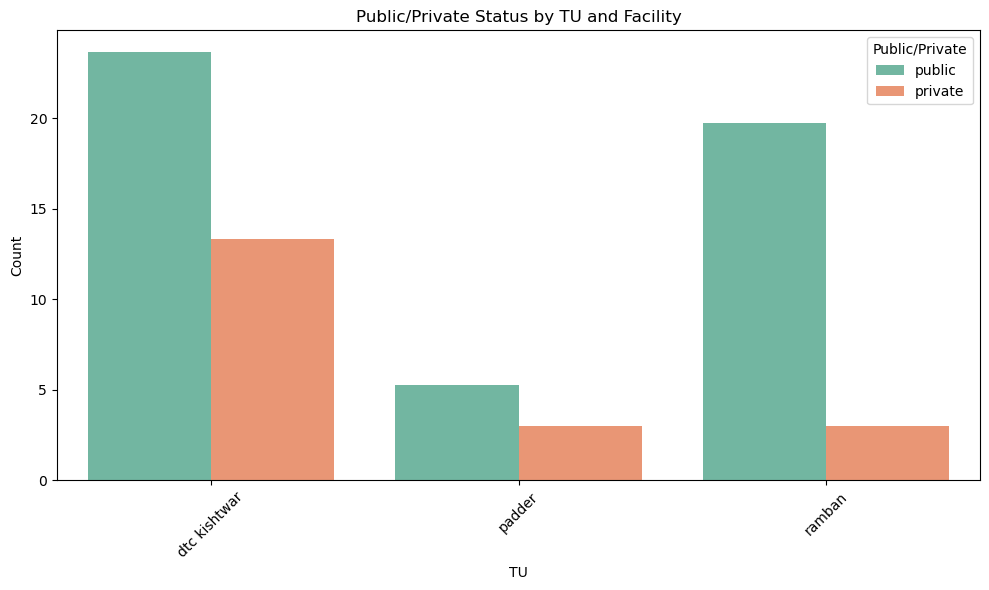

In [91]:
data_grouped = data.groupby(['TU', 'Diagnosed from which Facility', 'Public/Private']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
# Plot with seaborn to get grouped bars
sns.barplot(data=data_grouped, x='TU', y='Count', hue='Public/Private', errorbar=None, palette='Set2', dodge=True)

plt.title('Public/Private Status by TU and Facility')
plt.xlabel('TU')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> Examining the relationship between Gender, age_group and Public/Private columns together to understand how gender and dydonostic types vary across different age groups.

In [92]:
data.groupby(['Gender','age_group'])[['age_group','Gender', 'Public/Private']].value_counts().reset_index()

,Gender,age_group,Public/Private,count
0,female,Middle-Aged Adults,public,19
1,female,Middle-Aged Adults,private,6
2,female,Young Adults,public,69
3,female,Young Adults,private,11
4,female,children,public,8
5,female,children,private,1
6,female,senior citizens,public,10
7,female,senior citizens,private,2
8,female,youth,public,10
9,female,youth,private,3


In [93]:
data.columns

Index(['TU', 'Diagnosed from which Facility', 'Public/Private', 'Address',
       'Diagnosis Date', 'Age', 'Gender', 'Type', 'Site', 'HIV Status',
       'TB Drug Regimen', 'Tretment Start Date', 'Weight', 'col_x',
       'Tretment Status', 'age_group'],
      dtype='object', name=1)

#### 5. Chi-square Test
> Performing Chi-square tests to assess the association between HIV Status and other categorical variables.

In [94]:
list = ['Gender', 'Age', 'age_group','Site', 'Type', 'TU', 'Address']

In [95]:
from scipy.stats import chi2_contingency
for i in list:
    contingency_table = pd.crosstab(data['HIV Status'], data[i])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(' ')
    print(f"Chi-square Statistic: {chi2}, p-value: {p}")
    if p < 0.05:
      print(f"There is a significant association between {i} and Status of HIV.")
    else:
      print(f"No significant association between  of {i} and Status of HIV.")
    print(' ')
    print('*'*30)

 
Chi-square Statistic: 1.9283124178506235, p-value: 0.7489422014670815
No significant association between  of Gender and Status of HIV.
 
******************************
 
Chi-square Statistic: 275.62756829067246, p-value: 0.5625848985143294
No significant association between  of Age and Status of HIV.
 
******************************
 
Chi-square Statistic: 25.597670309476733, p-value: 0.05995871308159371
No significant association between  of age_group and Status of HIV.
 
******************************
 
Chi-square Statistic: 372.88094973576295, p-value: 8.441005051782261e-67
There is a significant association between Site and Status of HIV.
 
******************************
 
Chi-square Statistic: 650.7617680751985, p-value: 2.3188607061777735e-111
There is a significant association between Type and Status of HIV.
 
******************************
 
Chi-square Statistic: 62.76210202504794, p-value: 1.3346598425564e-10
There is a significant association between TU and Status of HIV.
 

#### Key findings:
- There is a significant relationship between site and status of HIV, TUs and Status of HIV, Address and status of HIV.

> Visualizing the distribution of HIV Status across different TUs using a count plot for better comparison. 

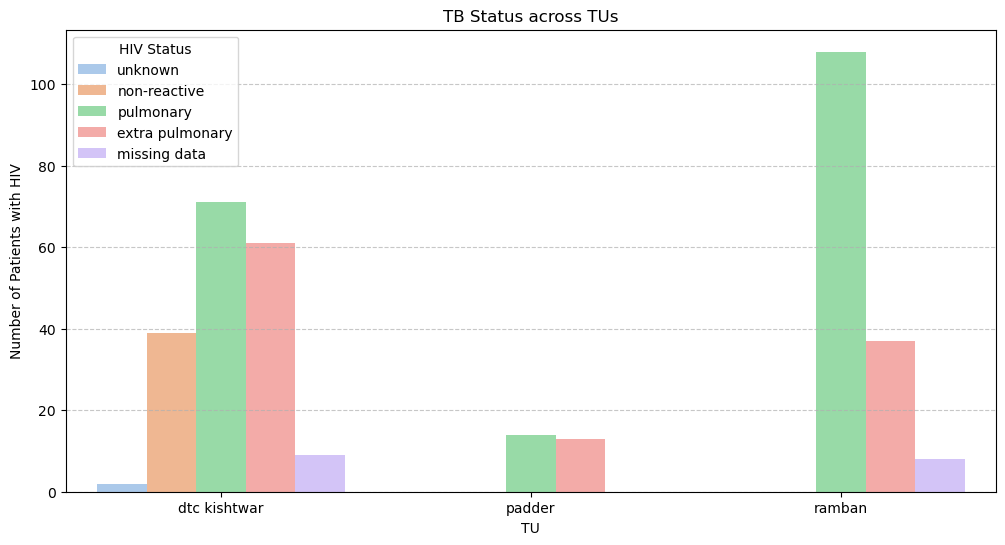

In [96]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='TU', hue='HIV Status', palette='pastel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('TB Status across TUs')
plt.xlabel('TU')
plt.ylabel('Number of Patients with HIV')
plt.show()

> Visualizing the distribution of HIV Status among TB patients across different addresses to identify regional patterns.

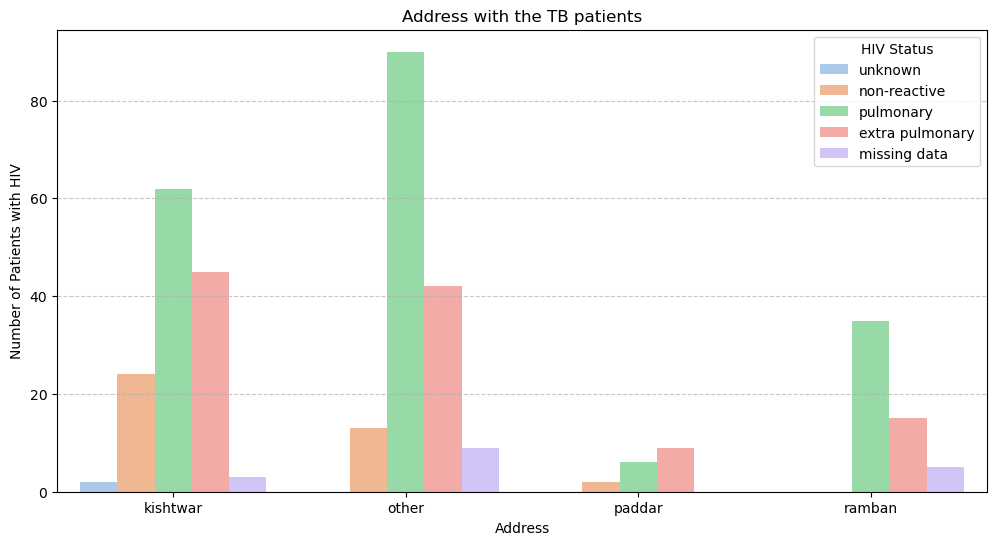

In [97]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Address', hue='HIV Status', palette='pastel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Address with the TB patients')
plt.xlabel('Address')
plt.ylabel('Number of Patients with HIV')
plt.show()

## Final conclusion 

#### Patient Distribution Across DTUs
•	Primary Distribution: The majority of patients, approximately 50.3%, originate from the DTC unit in Kishtwar with a smaller yet significant, 42.3% from Ramban, while Paddar represents a smaller portion, with 7.5% of cases. 
•	Geographic Insights: A substantial 64.4% of patients across all three DTUs were diagnosed within the Doda District. Additional cases are recorded from nearby Jammu (22.7%) and Kashmir regions (10%), indicating a concentration of cases within Jammu and Kashmir.
•	Proximity Effect: The high concentration of patients diagnosed in Doda may relate to the proximity of the place from Kishtwar, Ramban, and Paddar, which are the main addresses of the infected TB patients. However, the existence of functional TB units in these areas, suggests that TB prevalence and identification may vary across districts, potentially due to the regional health care service available or local transmission factor. Doda, which serves as a central diagnostic hub, reflects the need for better case detection facilities in the neighborhood of the hotspot areas.

#### Patient Address and Treatment Unit Alignment

•	Address Data Observations: A notable proportion of patients either lacked a valid address or resided outside the immediate treatment area. Patients with addresses close to the DTUs are receiving the treatment near their respective addresses. 

•	However, several patients are receiving treatment at locations farther from their homes, with Paddar, in particular, seeing a comparable share of patients from Kishtwar. 
•	Kishtwar also serves many patients from Ramban and Paddar regions, highlighting the cross-district movement for treatment accessibility.

#### Diagnosis and Referral Patterns

•	Referrals: A majority of patients, irrespective of demographic variables (age, gender, area, HIV status), were diagnosed in Doda or Jammu and subsequently referred to DTC Kishtwar or Ramban, with a smaller fraction directed to Paddar. The majority of the patients getting diagnosed in Kashmir are receiving treatment from Ramabn.

•	Public Healthcare Dominance: As evident from the data, public health services play a crucial role in TB detection, as their diagnostics were predominant over private services. A significant portion of treatment initiation data is missing for both privately and publicly diagnosed cases, which raises concerns about tracking and continuity of care in both sectors. Approximately 2% of individuals diagnosed through the public sector were misdiagnosed, highlighting a need for improved diagnostic accuracy. The cases diagnosed through private facilities were primarily seen in Jammu.


•	TB spread in Low-Income Populations: Targeted screening and diagnostics facilities may account for the concentration of cases in public healthcare, as these affordable services are often preferred by economically disadvantaged populations, highlighting a potential spread of TB in lower-income communities.
•	Diverse Patient Types Across DTUs: Each TU received many new TB cases; however, DTU Kishtwar exhibited a broader spectrum of case types, with the highest proportion of extrapulmonary and pulmonary TB patients. The large proportion of new cases indicates active transmission in the community and the effectiveness of TB screening programs in identifying new or previously undiagnosed cases. Kishtwar and Ramban also saw some retreatment cases, underscoring the importance of follow-ups and sustained or repeated care. 

#### Diagnostic Accuracy

•	Missing Data: A significant portion of patient records was incomplete, complicating unbiased data analysis and can obscure critical insights needed for effective healthcare. Strengthening data management processes could help bridge treatment gaps for effective prevention measures and ultimately improve patient outcomes. 
•	Invalid Data: Some portion of the patient information was invalid which may lead to difficulty in follow-ups thus measures, such as reliable data entry, implementing validation checks, and encouraging regular data audits, healthcare providers could achieve more comprehensive and accurate information. This approach would enhance the quality of analyses, making it easier to identify and address treatment gaps.
•	Diagnostic Errors: Data indicates instances where DTC Kishtwar and Ramban patients were misdiagnosed, signaling the need for strengthened diagnostic protocols, to ensure appropriate treatment and avoid resource misallocation.

#### Demographic Breakdown of TB Cases

•	Gender: Males showed a higher incidence of TB across all three TUs. The disparity could reflect the health-seeking practices between genders. It is essential to pay close attention to women's health in this context.
•	Age Trends:  With young adults (18-45 years) representing the largest group (55.0%), middle-aged adults (45-65 years) followed at 22.7%, with smaller proportions for senior citizens, children and youth, thus indicating a high impact on the working-age population or increased vulnerability with the aging immune system. Many cases of death were observed among senior citizens, possibly due to the increased risk of TB associated with age. 

#### TB Case Classification and Diagnostic Methods

•	Site of TB: Most of the recorded cases are new, with some involving pulmonary or extrapulmonary sites and retreatment cases.
•	Diagnostic Techniques: The "other" category and Trunat (MTB-RIF) represent the most common diagnostic methods, followed by chest X-rays and microscopy (ZN and fluorescent). This diversity in diagnostic methods suggests the need for more standardized diagnostic protocols across the region.

####  HIV Co-infection: 

•	TB patients with pulmonary HIV represent the majority (52.7%), followed by extrapulmonary cases (30.3%). Non-reactive HIV cases comprise 11.7% of the population, while 5% remain unconfirmed. Kishtwar hosts a higher number of extrapulmonary cases, while Ramban records more pulmonary cases. Notably, non-reactive cases are concentrated in Kishtwar. The number of TB patients with active HIV cases, along with the serious threat posed by HIV to TB treatment, underscores the need for urgent attention. The data clearly shows that patients who died, regardless of age, gender, or the site of TB, had a history of active HIV.

•	Inferential Analysis

  - Chi-Square Test Findings: Hypothesis testing using the Chi-Square test indicated no significant association between gender or age and HIV status, suggesting these factors do not influence HIV prevalence in the TB patient population.
  - Significant Associations: Strong associations were found between the TB site, TB case type, address, and treatment unit, suggesting that patient location and TB classification may impact treatment patterns and resource requirements.


## Summary

This analysis uncovered critical patterns in Tuberculosis (TB) cases from the Kishtwar district of Jammu and Kashmir, using real-world hospital data. Through demographic segmentation, exploratory data analysis, and statistical methods, several actionable insights emerged:

- Public healthcare facilities are the primary source of diagnosis and treatment, highlighting the need for better infrastructure and support within Treatment Units (TUs).

- Middle-aged individuals (31–45 years) showed the highest TB prevalence, suggesting a need for age-targeted awareness and screening programs.

- Male patients accounted for a higher share of positive cases, which could reflect behavioral, occupational, or access-related gender disparities.

- The presence of missing and inconsistent data emphasizes the importance of improved data recording practices within local healthcare systems.

- Strengthening data-driven decision-making can help bridge treatment gaps and ensure more equitable TB prevention strategies across the district.

#### Use Case 

The findings can help local healthcare authorities:

- Strengthen TB awareness campaigns in high-risk areas.

- Improve data recording practices.

- Ensure better follow-up and treatment completion.

